In [161]:
import pandas as pd
import googlemaps
import os
from dotenv import load_dotenv, find_dotenv
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
# load up the entries as environment variables
load_dotenv(dotenv_path)
# get the path of data
path_interim_data = os.environ.get("PATH_INTERIM_DATA_CLEANED")
path_processed_data = os.environ.get("PATH_PROCESSED_DATA")

# set filename
filename = 'praças.csv'


In [180]:
path_data = path_interim_data + filename
data = pd.read_csv(path_data)

#data.replace(True,'Without Geo-Coordinates', inplace=True)
#data.replace(False,'With Geo-Coordinates', inplace=True)
data.head()

,Nome,Descriçao
0,PRAÇA AMADOR BUENO,Situada no Jardim Centenário
1,PRAÇA ITÁLIA,Lei nº1.882/54
2,PRAÇA OSWALDO CRUZ,"Localizada na rua Conde do Pinhal, ao lado do..."
3,PRAÇA CEL. PAULINO CARLOS DE ARRUDA BOTELHO,(Defronte a Catedral) Formada pelas ruas Cond...
4,PRAÇA DOS POMBOS,Terreno situado entre o prolongamento da rua ...


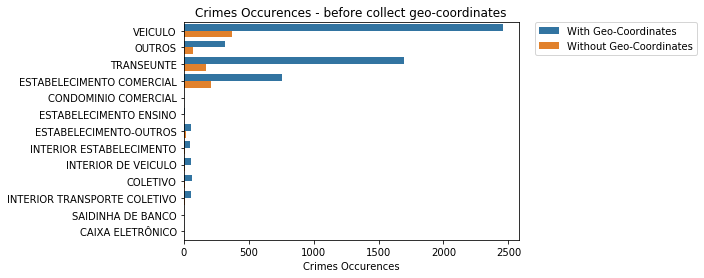

In [87]:
ax = sns.countplot(y="Conduta", hue='no_ref',data=data)
ax.set_title('Crimes Occurences - before collect geo-coordinates')
ax.set_xlabel('Crimes Occurences')
ax.set_ylabel('')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.figure.savefig('../reports/figures/Types_crimes_before_collecting_geocoordinates.svg', bbox_inches="tight")

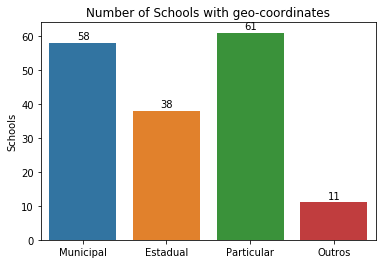

In [167]:
ax = sns.countplot(x="type",data=data)
ax.set_title('Number of Schools with geo-coordinates')
ax.set_xlabel('')
ax.set_ylabel('Schools')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()+1))
ax.figure.savefig('../reports/figures/escolas.svg', bbox_inches="tight")

In [177]:

path_data = path_processed_data + 'praças.xlsx'
data_processed = pd.read_excel(path_data)

data_processed['no_ref'] = data_processed['LATITUDE'].isna()
data_processed.replace(True,'Without Geo-Coordinates', inplace=True)
data_processed.replace(False,'With Geo-Coordinates', inplace=True)

#filename_missing = 'restaurantes_missing_georeferences.csv'
#path_data = path_interim_data + filename_missing
#data_missing = pd.read_csv(path_data)


#path_data = path_interim_data + 'araraquara_data.csv'
#data_arara = pd.read_csv(path_data)

#data_missing['no_ref'] = 'Without Geo-Coordinates'
#data_processed['no_ref'] = 'With Geo-Coordinates'
#data_arara['no_ref'] = 'Araraquara'

data['status_geo'] = 'Before'
data_processed['status_geo'] = 'After'
#data_missing['status_geo'] = 'After'

data =  pd.concat([data, data_processed])

C:\Users\Tiago\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



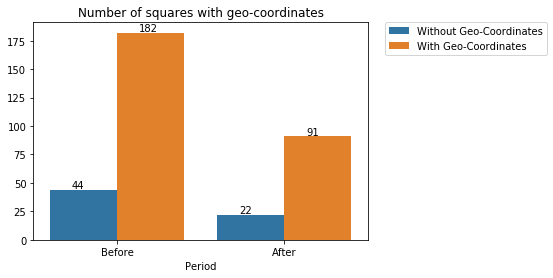

In [178]:
ax = sns.countplot(x="status_geo", hue='no_ref',data=data)
ax.set_title('Number of squares with geo-coordinates')
ax.set_xlabel('Period')
ax.set_ylabel('')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.13, p.get_height()+1))
ax.figure.savefig('../reports/figures/praças.svg', bbox_inches="tight")

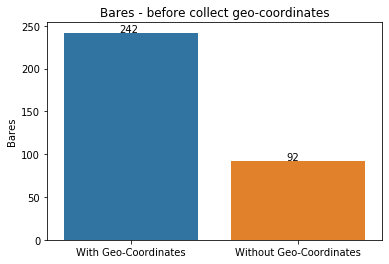

In [127]:
#data = pd.concat([data, data_arara])
ax = sns.countplot(x="no_ref",data=data)
ax.set_title('Bares - before collect geo-coordinates')
ax.set_xlabel('')
ax.set_ylabel('Bares')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()+1))
ax.figure.savefig('../reports/figures/Bares_after_collecting_geocoordinates.svg', bbox_inches="tight")